# Capítulo 3. Algoritmos genéticos.
> Autor: Natalia Cely Callejas, Ronald Arturo Chavez.\
> Universidad Nacional de Colombia  
> Mayo 1, 2025

## Introducción 
Los algoritmos genéticos son herramientas que emulan los ciclos de vida y los comportamientos genétidos de los seres humanos, desarrollados entre 1960 y 1970, describen el flujo de la evolución humana que siguen:
1. Selección. De los organismos (soluciones) más aptos.
2. Mutación. Posibilidad de cambios para mantener la diversidad.
3. Cruce. Las características de los seleccionados se transmiten a la siguiente generación.

Bajo el marco de una serie de reglas que lo condicionan concordantes con la aplicación, así, los Algoritmos genéticos son utilizados para problemas de combinación y optimización, sobretodo en situaciones de altos órdenes o complejidad, cuando no existe una forma directa para abarcarlos. 

## Verdadera Democracia
En este punto se simula una situación política en la que un jefe de gobierno busca repartir el poder político (ministerios, agencias, etc.) entre cinco partidos políticos que conforman el congreso, de forma proporcional a la representación que cada uno tiene (medida en curules).

In [4]:
import random
from collections import Counter

# -----------------------------
# Paso 1: Distribuir curules no uniformemente
# -----------------------------

partidos = ['A', 'B', 'C', 'D', 'E']
curules = random.choices(partidos, weights=[0.3, 0.25, 0.2, 0.15, 0.1], k=50)
recuento_curules = Counter(curules)
print("Curules por partido:", recuento_curules)

# -----------------------------
# Paso 2: Generar entidades y pesos políticos
# -----------------------------

entidades = [{'nombre': f'Entidad_{i+1}', 'peso': random.randint(1, 100)} for i in range(50)]
print("\nEjemplo de entidades y pesos:")
for e in entidades[:5]:
    print(e)

# -----------------------------
# Paso 3: Crear un individuo aleatorio
# -----------------------------

def crear_individuo():
    return [random.randint(0, 4) for _ in range(50)]

# -----------------------------
# Paso 4: Función de fitness
# -----------------------------

def calcular_fitness(individuo, entidades, recuento_curules):
    poder_partidos = [0] * 5
    for i, partido_idx in enumerate(individuo):
        poder_partidos[partido_idx] += entidades[i]['peso']

    total_poder = sum([e['peso'] for e in entidades])
    poder_ideal = [recuento_curules[p] / 50 * total_poder for p in partidos]

    error = sum((poder_partidos[i] - poder_ideal[i])**2 for i in range(5))
    return 1 / (1 + error)

# -----------------------------
# Paso 5: Algoritmo genético
# -----------------------------

def algoritmo_genetico(entidades, recuento_curules, n_generaciones=100, poblacion_size=100):
    poblacion = [crear_individuo() for _ in range(poblacion_size)]

    for _ in range(n_generaciones):
        fitness_scores = [calcular_fitness(ind, entidades, recuento_curules) for ind in poblacion]

        seleccionados = random.choices(poblacion, weights=fitness_scores, k=poblacion_size)

        nueva_poblacion = []
        for i in range(0, poblacion_size, 2):
            padre1 = seleccionados[i]
            padre2 = seleccionados[i+1]

            punto = random.randint(1, 49)
            hijo1 = padre1[:punto] + padre2[punto:]
            hijo2 = padre2[:punto] + padre1[punto:]

            if random.random() < 0.1:
                hijo1[random.randint(0, 49)] = random.randint(0, 4)
            if random.random() < 0.1:
                hijo2[random.randint(0, 49)] = random.randint(0, 4)

            nueva_poblacion.extend([hijo1, hijo2])

        poblacion = nueva_poblacion

    fitness_scores = [calcular_fitness(ind, entidades, recuento_curules) for ind in poblacion]
    mejor_idx = fitness_scores.index(max(fitness_scores))
    return poblacion[mejor_idx]

# -----------------------------
# Paso 6: Ejecutar y mostrar resultado
# -----------------------------

solucion = algoritmo_genetico(entidades, recuento_curules)

# Evaluar distribución final
asignacion_poder = [0] * 5
for i, partido_idx in enumerate(solucion):
    asignacion_poder[partido_idx] += entidades[i]['peso']

print("\nDistribución final del poder político:")
for i, p in enumerate(partidos):
    print(f"Partido {p}: {asignacion_poder[i]} puntos de poder")



Curules por partido: Counter({'A': 19, 'B': 12, 'E': 8, 'C': 6, 'D': 5})

Ejemplo de entidades y pesos:
{'nombre': 'Entidad_1', 'peso': 47}
{'nombre': 'Entidad_2', 'peso': 15}
{'nombre': 'Entidad_3', 'peso': 91}
{'nombre': 'Entidad_4', 'peso': 24}
{'nombre': 'Entidad_5', 'peso': 39}

Distribución final del poder político:
Partido A: 915 puntos de poder
Partido B: 580 puntos de poder
Partido C: 288 puntos de poder
Partido D: 241 puntos de poder
Partido E: 384 puntos de poder





## Optimización de despacho de energía en relación con los costos de transporte
La situación estudiada es la siguiente:
> Una empresa proveedora de energía eléctrica dispone de 4 plantas de generación para satisfacer la demanda diaria de energía eléctrica en Cali, Bogotá, Medellín y Barranquilla. Cada una puede generar 3, 6, 5 y 4 GW al día respectivamente. Las necesidades de Cali, Bogotá, Medellín y Barranquilla son de 4, 3, 5 y 3 GW al día respectivamente. Lo costos por el transporte de energía por cada GW entre plantas y ciudades se dan en la siguente tabla:


|        |Cali|Bogotá|Medellín|Barranquilla|
|--------|----|------|--------|------------|
|Planta A|1   |4     |3       |6           |
|Planta B|4   |1     |4       |5           |
|Planta C|3   |4     |1       |4           |
|Planta D|6   |5     |4       |1           |

> Y los costos de $KW-H$ por generador se dan en la siguiente tabla:

|Generador | KW-H |
|----------|------|
|Planta A  | 680  |
|Planta B  | 720  |
|Planta C  | 660  |
|Planta D  | 750  |

Para poder encontrar el mejor despacho de energía por medio de algortimos genéticos se crea el siguiente programa:

In [5]:
#Importe de librerías necesarias
import random
import math

#Creación de matrices con el enunciado
Cali=[1,4,3,6]
Bogota=[4,1,4,5]
Medellin=[3,4,1,4]
Barranquilla=[6,5,4,1]
MatrixTransportes=[Cali, Bogota, Medellin, Barranquilla]

Costos=[680,720,660,750]

EnergiaMax=[6,5,4,6]

#Parámetros para el algoritmo genético
p_mut=0.1 #Probabilidad de mutación, estática
M=10 #Numero de generaciones

#Definición de funciones AG
# -----------------------------
# Paso 1: Generación de la población
# -----------------------------
def Generacion(maximos,K):
    pob = [[random.randint(1, maximos[i]) for i in range(len(maximos))] for _ in range(K)]
    return pob

# -----------------------------
# Paso 2: Evaluación de aptitud
# -----------------------------
def Evaluacion(pob, l,codificacion):
    apt_crom=[]
    apt_pob=0
    probab=[]
    for i in range (0,l):
        crom=pob[i]
        apt=Evalua(crom, l,codificacion)
        apt_pob+=apt
        apt_crom.append(apt)
    for i in range(0,l):
        prob_crom=apt_crom[i]/apt_pob
        probab.append(prob_crom)
    return probab

# -----------------------------
# Paso 3: Función de aptitud
# -----------------------------
def Evalua(crom,l,codificacion):
    aptitud=0
    costo=0
    for i in range(0,l):
        a=int(crom[i])*int(codificacion[i])
        costo+=a
    aptitud=14820-costo #Valor máximo de costo posible
    return aptitud

# -----------------------------
# Paso 4: Selección
# -----------------------------
def Seleccion(pob,probab,l):
    j=0
    limite=2*max(probab) #Umbral de comparación
    new_pob=[] #Nueva población 
    while len(new_pob) < l: #Hasta lenar con la nueva población
        for i in range(l): 
            if len(new_pob) >= l: #Condición de ruptura para cerrar el ciclo 
                break
            aleat = random.uniform(0, limite) #valor random para selección
            if probab[i] > aleat: #Si la probabilidad es mayor
                new_pob.append(pob[i]) #Agrega el cromosoma
    return new_pob

# -----------------------------
# Paso 5: Cruce
# -----------------------------
def Cruce(new_pob,l):
    i=0
    hijos=[]
    while (i<l):
        padre1=new_pob[i]
        padre2=new_pob[i+1]
        pc=random.randint(1,len(padre1)-1) #Seleccion aleatoria del punto de cruce
        hijo1=padre1[:pc]+padre2[pc:] #Cruce 1
        hijo2=padre2[:pc]+padre1[pc:] #Cruce 2
        hijos.append(hijo1)
        hijos.append(hijo2)
        i+=2
    return hijos

# -----------------------------
# Paso 6: Mutación
# -----------------------------
def Mutacion(hijos,p_mut,l) :
    K=len(hijos)
    total=K*l
    segmento = 1/p_mut
    n_mutaciones = total/segmento
    i = 0
    while i < n_mutaciones:
        muta = random.randint(0, total-1)
        x = math.floor(muta/l)
        y = muta%l
        if hijos[x][y] == 0:
            hijos[x][y] = 1
        else:
            hijos[x][y] = 0
        i += 1
    return hijos



# -----------------------------
# Rutina general
# -----------------------------
pob=Generacion(EnergiaMax, 2) #Generación de padres aleatorios
print("Población: ",pob)
i=0
while(i<M):
    prob=Evaluacion(pob,len(pob),Costos)#Evaluación de sus aptitudes y probabilidad de ser seleccionados
    #print("Probabiidades de selección: ", prob)
    selected=Seleccion(pob,prob,len(pob))
    #print("Población elegida: ",selected)
    hijos=Cruce(selected,len(pob)) #Cruce de los cromosomas seleccionados
    #print("Nueva población de hijos: ",hijos)
    pob=Mutacion(hijos,p_mut,4)
    print("Nueva población Mutada: ",pob)
    prob=Evaluacion(pob,len(pob),Costos)
    i+=1


Población:  [[4, 5, 4, 3], [6, 5, 2, 2]]
Nueva población Mutada:  [[4, 5, 2, 2], [6, 0, 4, 3]]
Nueva población Mutada:  [[4, 1, 4, 3], [6, 5, 2, 2]]
Nueva población Mutada:  [[4, 0, 4, 2], [6, 5, 2, 3]]
Nueva población Mutada:  [[4, 5, 2, 0], [6, 0, 4, 2]]
Nueva población Mutada:  [[4, 5, 2, 1], [4, 5, 2, 0]]
Nueva población Mutada:  [[0, 5, 2, 1], [4, 5, 2, 0]]
Nueva población Mutada:  [[0, 0, 2, 1], [0, 5, 2, 1]]
Nueva población Mutada:  [[0, 5, 2, 1], [1, 0, 2, 1]]
Nueva población Mutada:  [[1, 5, 2, 1], [0, 1, 2, 1]]
Nueva población Mutada:  [[1, 1, 2, 1], [0, 5, 0, 1]]


# Validación con imágenes
Para crear una población de 50 matrices de 120 por 180, con números de 0 a 255 y convertirla en una gráfica RGB con validación por medio de una imagen se crea el siguiente código.

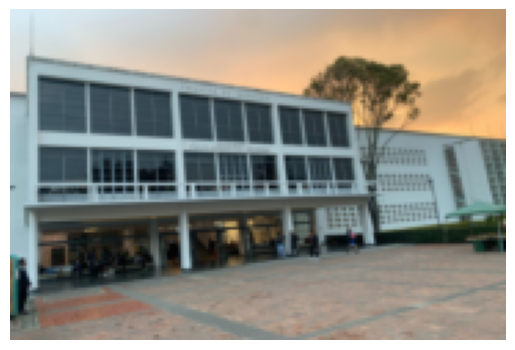

Generación 0, mejor score: -8615.65


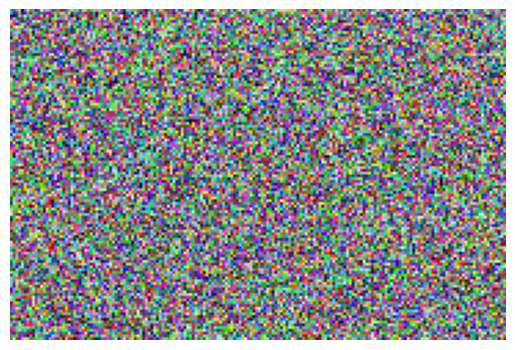

KeyboardInterrupt: 

In [6]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize  # para redimensionar la imagen

# Parámetros del ejercicio
n=50
limInf=0
limSup=255
length=120
rows=180

# Extra para el final del ciclo
mejor_score_anterior=-20000

#-----
# Mostrar la imagen utilizando matplotlib
#----
def mostrar_imagen(imagen):
    plt.imshow(imagen)
    plt.axis("off")
    plt.show()

# ----
# Cargar la imagen objetivo
# ----
def cargar_objetivo(ruta_imagen, alto=120, ancho=180):
    img = mpimg.imread(ruta_imagen)# Cargar imagen
    if img.max() <= 1.0:# Asegurar que está en [0, 255] como uint8
        img = (img * 255).astype(np.uint8)
    else:
        img = img.astype(np.uint8)
    img_resized = resize(img, (alto, ancho), preserve_range=True, anti_aliasing=True).astype(np.uint8)# Redimensionar al tamaño deseado
    return img_resized

#-----
# Generación de las matrices
#----
def Generator(n,length,rows):
    return np.random.randint(0, 256, size=(n, length, rows, 3), dtype=np.uint8)

# ---
# Función de aptitud
# ---
def aptitud(individuo, objetivo):
    # Combinación MSE + nitidez (mejora detalle visual)
    mse = np.mean((individuo.astype(np.float32) - objetivo.astype(np.float32))**2)
    return -mse 


# ---
# Función de cruce
# ---
def cruzar(padre1, padre2):
    mascara = np.random.randint(0, 2, size=padre1.shape, dtype=bool)
    hijo = np.where(mascara, padre1, padre2)
    return hijo

# ---
# Función de mutación
# ---
def mutar(individuo, tasa=0.0001):
    mutacion = np.random.rand(*individuo.shape) < tasa
    valores = np.random.randint(0, 256, size=individuo.shape)
    individuo[mutacion] = valores[mutacion]
    return individuo


#-----
#Main
#----
poblacion=Generator(n,length,rows)
# print(poblacion)
objetivo = cargar_objetivo("Multimedia/Insignia.JPG")
mostrar_imagen(objetivo)

for generacion in range(500*n):
# while  max(puntuaciones)<-1200: #Criterio de aceptación
    puntuaciones = [aptitud(ind, objetivo) for ind in poblacion]
    
    # Selección: los 10 mejores
    mejores_idx = np.argsort(puntuaciones)[-10:]
    elite = [poblacion[i] for i in mejores_idx] #Guarda en elite
    
    # Cruza para formar nueva población
    nueva_pob = []
    while len(nueva_pob) < len(poblacion):
        padres = random.choices(elite, k=2)
        hijo = cruzar(*padres)
        hijo = mutar(hijo)
        nueva_pob.append(hijo)
    
    poblacion = np.array(nueva_pob)

    if generacion % 1000 == 0: #Mostrar cada 1000 iteraciones
        mejor_score_actual=max(puntuaciones)
        print(f"Generación {generacion}, mejor score: {max(puntuaciones):.2f}")
        mostrar_imagen(poblacion[mejores_idx[-1]])

        #Verificación de detención del ciclo
        if abs(mejor_score_actual-mejor_score_anterior)<=100:
            print("Resultado final alcanzado")
            break
        mejor_score_anterior = mejor_score_actual



# Aporte de las herramientas LLM
El uso de una LLM como ChatGPT en este caso facilita la modelación, resolución y comprensión de un problema político complejo mediante inteligencia artificial. Aportando tanto en la parte técnica como en la parte conceptual.
Para la optimización de costos de generación energética, se utilizó ChatGPT, ya que el código de programa sugerido por el capítulo contaba con ciertas redundancias o errores, es por esto que se le preguntó una validación del código alternativo (generado por nosotros) y una comparación entre los resultados para definir mejoras posibles. Adicionalmente, fue utilizado para mejorar la función de aptitud en el caso de las imágenes permitiendo una convergencia más rápida a la solución y la disminución de líneas de código, haciéndolo lo más eficiente posible.


# Conclusiones
Los algoritmos genéticos son herramientas efectivas para resolver problemas de asignación y proporcionalidad compleja. En este caso, permitieron encontrar una distribución del poder político entre partidos que se ajusta de manera óptima a la representación congresional que cada uno posee.

La simulación refleja un escenario realista de gobernabilidad multipartidista, donde el poder debe repartirse de forma equitativa para asegurar la estabilidad política y la cooperación entre actores. Este tipo de modelo puede ser útil en contextos de negociación y toma de decisiones en gobiernos de coalición. El uso de técnicas de inteligencia artificial facilita la toma de decisiones objetivas en problemas sensibles como la distribución del poder, minimizando sesgos humanos al buscar soluciones basadas en criterios matemáticos y proporcionales.

Adicionalmente, los algoritmos genéticos reflejan una forma eficiente de iteración a través de posibles soluciones y su respectivas evoluciones para acercarse a un problema cuya solución no está parametrizada, como los valores RGB en los pixeles de una imagen o la mejor forma de distribución en generación de energía, lo que permite una alternativa para situaciones con soluciones no sistemáticas o de las que no se conoce una ruta a seguir para abarcar más que la denominada "prueba y error"